In [249]:
import pandas as pd
import numpy as np
import scipy
import geopandas
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# What Does India's 2001 Census Data Tell Us?

This dataset came from Kaggle https://www.kaggle.com/bazuka/census2001/home and contains 2001 census data from India. The set was populated from several PDFs containing India's census data which can be found here: http://www.censusindia.gov.in/(S(ogvuk1y2e5sueoyc5eyc0g55))/Tables_Published/Basic_Data_Sheet.aspx

This database has been extracted from Census of 2001 and includes data of 590 districts, having around 80 variables each, including the State, District, population, male to female ratio, the growth change from the 1991 census, as well as access to essential things like busses, telegraph/telephone facilities, health care centers, and permanent housing. The dataset also explores literacy and education level. 

India is such a remarkable country due to the vastness of the people who live there, as well as the country itself. As it hosted, as of 2001, over a billion people, 122 major languages, and 1599 other languages according to the 2001 census data. The total population of India was counted as 1,028,737,436 consisting of 532,223,090 males and 496,514,346 females. Total population increased by 182,310,397, 21.5% more than the 846,427,039 people counted during the 1991 census.

In [250]:
#Growth refers to growth percent since the last census in 1991, meaning the growth over 10 years
#The column 'ratio_male_female' is the sex ratio of females per 1000 males
#PTT_facilities refers to post, telephone and telegraph facilities


india_census = pd.read_csv('all.csv')
india_census = india_census.rename(columns={'Unnamed: 0': 'Unnamed',
                                            'Growth..1991...2001.': 'Growth', 
                                            'Scheduled.Caste.population': 'Scheduled', 
                                            'Number.of.households': 'Households', 
                                            'Household.size..per.household.': 'Household_size', 
                                           'Sex.ratio..females.per.1000.males.': 'Ratio_male_female',
                                            'Persons..literate': 'Persons_literate',
                                           'Males..Literate': 'Males_literate',
                                           'Females..Literate': 'Females_literate',
                                           'Persons..literacy.rate': 'Literacy_rate',
                                            'Males..Literatacy.Rate': 'Male_literacy_rate',
                                             'Females..Literacy.Rate': 'Female_literacy_rate',
                                           'Total.Educated': 'Total_educated',
                                            'Data.without.level': 'Data_without_level',
                                            'Below.Primary': 'Below_primary_edu',
                                            'Matric.Higher.Secondary.Diploma': 'Secondary_diploma',
                                            'Graduate.and.Above': 'Graduate_deg_or_higher',
                                            'Total.Inhabited.Villages': 'Total_inhabited_villages',
                                            'Drinking.water.facilities': 'Drinking_water_facilities',
                                            'Safe.Drinking.water': 'Safe_drinking_water',
                                            'Electricity..Power.Supply': 'Power_supply',
                                            'Electricity..domestic.': 'Electricity_domestic',
                                            'Electricity..Agriculture': 'Electricity_agriculture',
                                            'Primary.school': 'Primary_schools',
                                            'Middle.schools': 'Middle_schools',
                                            'Secondary.Sr.Secondary.schools': 'Secondary_schools',
                                            'Medical.facility': 'Medical_faciliites',
                                            'Primary.Health.Centre': 'Primary_health_centers',
                                            'Primary.Health.Sub.Centre': 'Primary_health_subcenter',
                                            'Post..telegraph.and.telephone.facility': 'PTT_facilities',
                                            'Bus.services': 'Bus_services',
                                            'Paved.approach.road': 'Paved_roads',
                                            'Mud.approach.road': 'Mud_roads',
                                            'Permanent.House': 'Permanent_housing',
                                            'Semi.permanent.House': 'Semi_perm_housing',
                                            'Temporary.House': 'Temp_housing'                       
                                           })
india_census.State.replace(['AN', 'CG', 'D_D', 'D_N_H', 'JK', 'MP', 'TN', 'UP','WB', 'HP'], 
                           ['Andaman and Nicobar', 'Chhattisgarh', 'Daman and Diu', 'Dadra and Nagar Haveli', 'Jammu and Kashmir',
                            'Madhya Pradesh', 'Tamil Nadu', 'Uttar Pradesh','West Bengal', 'Himachal Pradesh'], inplace=True)
india_census = india_census.drop('Unnamed', 1)
india_census['Percent_female'] = (india_census.Females / india_census.Persons)*100 
#india_census['1991_population'] = india_census.Persons*(india_census.Growth)

india_census.head(3)


,State,District,Persons,Males,Females,Growth,Rural,Urban,Scheduled,Percentage...SC.to.total,...,Primary_health_centers,Primary_health_subcenter,PTT_facilities,Bus_services,Paved_roads,Mud_roads,Permanent_housing,Semi_perm_housing,Temp_housing,Percent_female
0,Andaman and Nicobar,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,-,-,...,16,78,161.0,187,201,243,28.7,39.1,32.0,45.772787
1,Andaman and Nicobar,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,-,-,-,...,4,31,36.0,49,51,111,28.0,33.3,38.7,46.151469
2,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,NaN,...,61,432,558.0,814,979,544,53.0,39.9,7.0,49.720398


## How Does the Country's Population Vary By State?

India's population in 2001 was over 1 billion people over 29 states. How does the population vary by state?

In [251]:
#Section the Data into states

df = india_census.groupby('State').aggregate(np.sum)
df = df.sort_values(by='Persons', ascending=False)

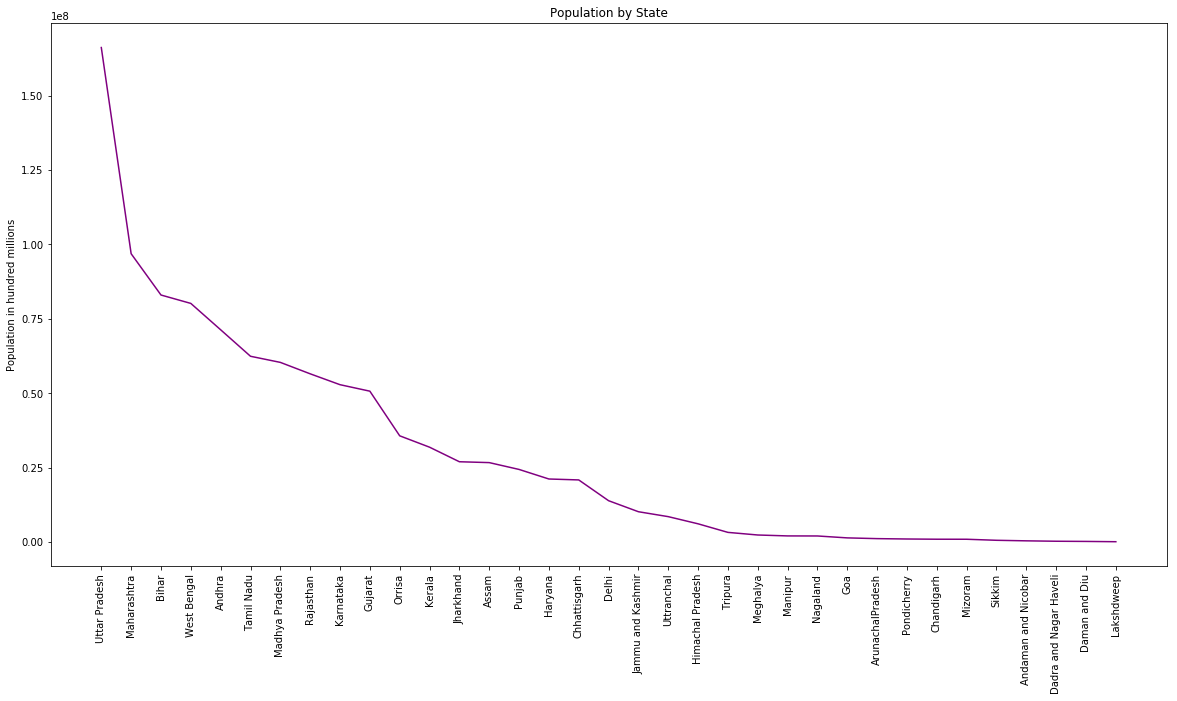

In [252]:
plt.figure(figsize=(20, 10))
plt.plot(df['Persons'], color='purple')
plt.ylabel('Population in hundred millions')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.show()

Now looking at the states as a whole, we can see that the Indian State with the highest population is Uttar Pradesh. This makes sense, since Uttar Pradesh is well known for being the most populous state in India as well as being the most populous country subdivision in the world. But what about the distribution over the state itself?

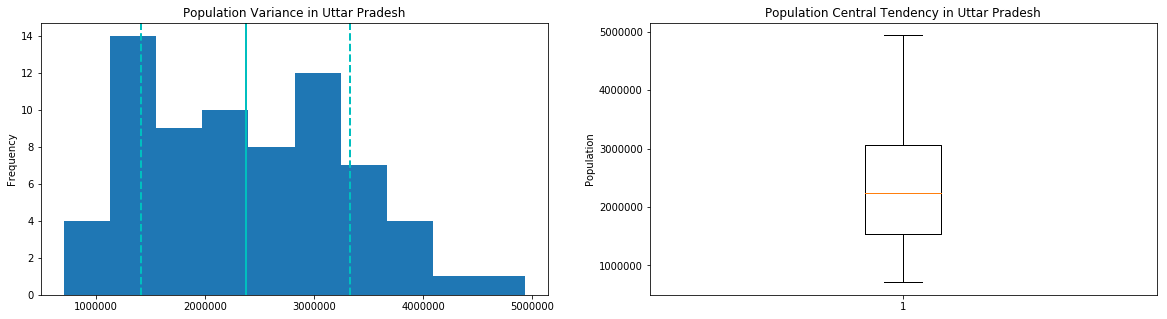

The most populated area in Uttar Pradesh has 4936105 people. The least populated area in Uttar Pradesh has 708447 people. The mean population is 2374256.0. The standard deviation is 960086.0 people.
The most populated city in India has 9610788 people and is located in 586    District Medinipur
Name: District, dtype: object of 586    West Bengal
Name: State, dtype: object


,State,District,Persons,Males,Females,Growth,Rural,Urban,Scheduled,Percentage...SC.to.total,...,Primary_health_centers,Primary_health_subcenter,PTT_facilities,Bus_services,Paved_roads,Mud_roads,Permanent_housing,Semi_perm_housing,Temp_housing,Percent_female
586,West Bengal,District Medinipur,9610788,4916370,4694418,15.68,8626883,NaN,NaN,NaN,...,175,878,2128.0,1807,4166,10016,20.1,40.5,39.4,48.845298


In [253]:
UP = india_census.loc[lambda df: india_census['State'] == "Uttar Pradesh", :]
UP = UP.sort_values(by='Persons', ascending=False)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(UP.Persons) 
plt.ylabel('Frequency')
plt.title('Population Variance in Uttar Pradesh')
# Add a vertical line at the mean.
plt.axvline(UP.Persons.mean(), color='c', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(UP.Persons.mean() + UP.Persons.std(), color='c', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(UP.Persons.mean()-UP.Persons.std(), color='c', linestyle='dashed', linewidth=2) 


plt.subplot(1, 2, 2)
plt.boxplot(UP.Persons)
plt.ylabel('Population')
plt.title('Population Central Tendency in Uttar Pradesh')
plt.show()

minimum_pop = UP.Persons.min()
maximum_pop = UP.Persons.max()
mean = round(UP.Persons.mean(), 0)
std = round(UP.Persons.std(), 0)
largest_pop = india_census.Persons.max()
largest_pop_state = india_census[india_census['Persons'] == largest_pop]


print("The most populated area in Uttar Pradesh has {} people. The least populated area in Uttar Pradesh has {} people. The mean population is {}. The standard deviation is {} people.".format(maximum_pop, minimum_pop, mean, std))

print("The most populated city in India has {} people and is located in {} of {}".format(largest_pop, largest_pop_state.District, largest_pop_state.State))

largest_pop_state


So the most populated district, according to our dataset, is in West Bengal with 9.6 million people. This might be strange, as we might think that the highest population in the dataframe would belong wherever Delhi is located (since, accordingly, the city with the highest population in India is New Delhi, and in 2001 New Delhi had a population of 13.85 million people). However, looking at our initial top 20 population graph, we can see that 'Delhi' is located alone. West Bengal is our 4th biggest state by population. However, we know that Delhi has more people than West Bengal, so there must be something else going on. Let's take a look at the dataframe entries from 'Delhi'

In [254]:
Delhi =  india_census.loc[lambda df: india_census['State'] == "Delhi", :]
Delhi = Delhi.sort_values(by='Persons', ascending=False)
Delhi

,State,District,Persons,Males,Females,Growth,Rural,Urban,Scheduled,Percentage...SC.to.total,...,Primary_health_centers,Primary_health_subcenter,PTT_facilities,Bus_services,Paved_roads,Mud_roads,Permanent_housing,Semi_perm_housing,Temp_housing,Percent_female
116,Delhi,District North West,2860869,1571689,1289180,60.12,265363,NaN,NaN,NaN,...,2,1,60.0,62,61,9,91.1,5.8,3.1,45.062532
124,Delhi,District South,2267023,1260025,1006998,50.27,160761,NaN,NaN,NaN,...,2,-,15.0,16,16,2,92.1,4.7,3.2,44.419399
122,Delhi,District West,2128908,1163084,965824,47.81,86794,NaN,NaN,NaN,...,-,-,9.0,9,9,1,92.0,4.9,3.1,45.367108
118,Delhi,District North East,1768061,956078,811983,62.52,141547,NaN,NaN,NaN,...,-,-,8.0,12,9,3,94.6,3.5,1.9,45.925056
123,Delhi,District South West,1755041,983615,771426,61.29,225454,NaN,NaN,NaN,...,2,2,49.0,51,51,3,91.7,5.3,2.9,43.954871
119,Delhi,District East,1463583,794074,669509,41.61,18223,NaN,NaN,NaN,...,-,-,2.0,3,3,-,93.2,3.4,3.4,45.744519
117,Delhi,District North,781525,427882,353643,13.3,46585,NaN,NaN,NaN,...,-,-,4.0,5,4,1,89.1,4.5,6.3,45.250376
121,Delhi,District Central,646385,350831,295554,(1.91),-,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,87.2,5.4,7.4,45.724143
120,Delhi,"District New Delhi (05), Delhi (07)",179112,99956,79156,2.47,-,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.1,7.2,10.7,44.193577


In India, the city of Delhi is itself considered the National Capital Territory of Delhi (NCT), and in the census it is treated as a standalone state. Therefore, the population is split up over Districts within the territory. Therefore, in our dataframe, we aren't seeing Delhi's total population all grouped together, instead we are seeing it spread out over the different districts of the city

In [255]:
Delhi = Delhi.groupby('State').aggregate(np.sum)
Delhi

,Persons,Males,Females,Households,Household_size,Ratio_male_female,Sex.ratio..0.6.years.,Persons_literate,Males_literate,Females_literate,...,Total_inhabited_villages,Drinking_water_facilities,Safe_drinking_water,Electricity..Power.Supply.,Primary_schools,PTT_facilities,Permanent_housing,Semi_perm_housing,Temp_housing,Percent_female
State,,,,,,,,,,,,,,,,,,,,,
Delhi,13850507,7607234,6243273,2733383.0,46.0,7385.0,7871.0,9664764,5700847,3963917,...,158.0,158.0,153.0,152.0,138.0,147.0,813.1,44.7,42.0,405.64158


This looks more like what we'd expect to see in terms of population: Delhi as a whole has 13.85 million people. However, because of the way it is broken up in the census data, it remains that the single largest district in India is located in West Bengal, District Medinipur 

Now that we've looked at population densities for India's most populated 20 states overall, let's ask a few questions about the growth of the population since 1991 (the last census), as well as ask some questions about the literacy rate in India as a whole, and the education density of the country. Let's try to answer the following questions:  

1. How much population growth was there in India from 1991 to 2001, and is it equal across the board?
2. What is the rate of literacy in different parts of India? Where is literacy highest and lowest, and does this correspond to the number of schools in the area? Is literacy focused mainly in the biggest cities, or is it evenly distributed across districts within the state?
3. What is the ratio of female to males in India, according to the 2001 census? India, as of 2018, ranks 127th out of 160 on the 'Gender Inequality Index'. What does female literacy in India look like? 

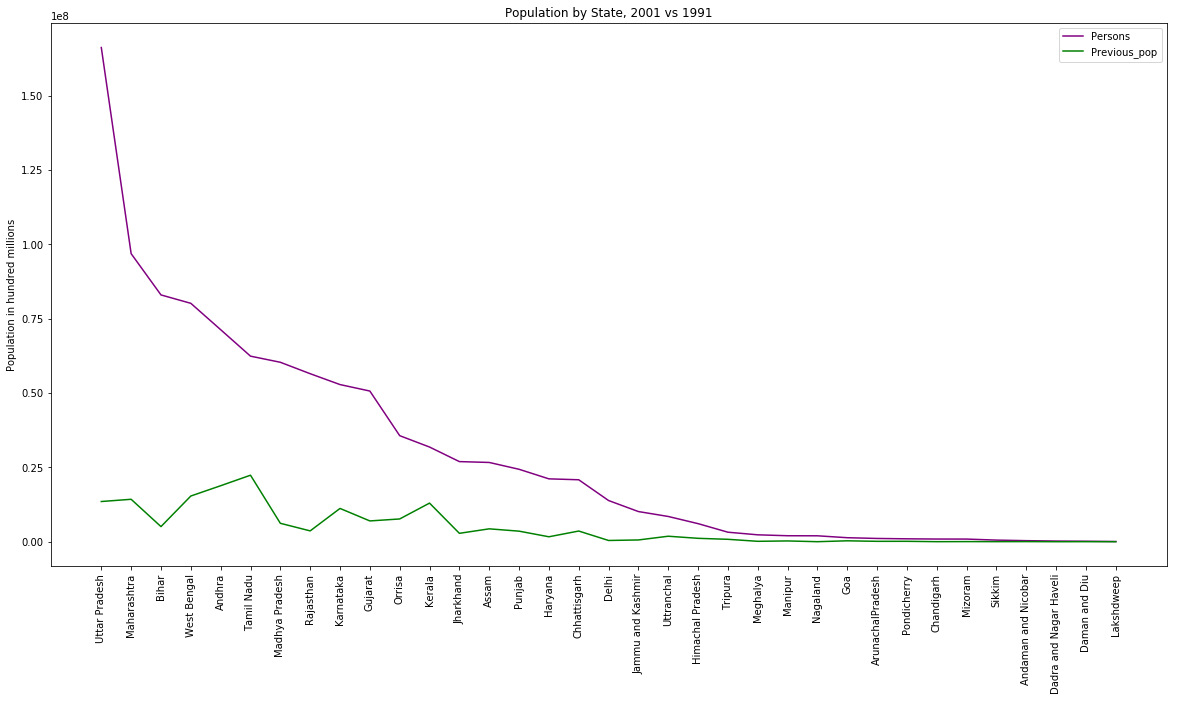

In [256]:
# Calculate the population of 1991 using our dataframe and the rate of growth from 1991 to 2001 in the 'Growth' index.

# Create a new column in our india_census dataframe of 1991 populations
# Since currently india_census['Growth'] is an object, we also need to change it 
# into a float so we can manipulate it numerically
# We calculate the 1991 population with the formula P(0) = P(t) e^-(r t), where P(t) is the 2001 population, P(0) is the 1991 population,
# and r is the rate of change, and 10 is the time. e is the Euler's number, a mathematical constant

from math import e

india_census['Growth'] = pd.to_numeric(india_census['Growth'], errors='coerce') 

india_census['Previous_pop'] = india_census.Persons * (e ** (-(india_census.Growth/100) * 10))


df = india_census.groupby('State').aggregate(np.sum)
df = df.sort_values(by='Persons', ascending=False)

#Now plot the 2001 population vs the 1991 population

plt.figure(figsize=(20, 10))
plt.plot(df['Persons'], color='purple')
plt.plot(df['Previous_pop'], color='green')
plt.plot()
plt.ylabel('Population in hundred millions')
plt.title('Population by State, 2001 vs 1991')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

Population definitely increased a lot in the top most populous states, but in our top most populous states, toward the end of the list the population doesn't look much different. Let's plot the top 10 most populated states, as well as the least populated states

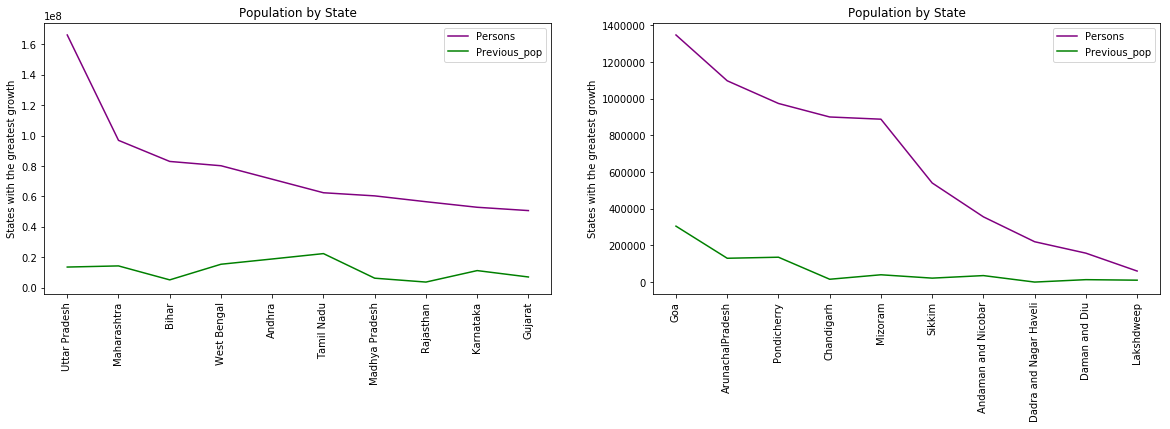

The percent growth of the head 10 states as a percentage is: State
Uttar Pradesh     1799.16
Maharashtra        686.25
Bihar             1058.42
West Bengal        331.65
Andhra             320.58
Tamil Nadu         303.83
Madhya Pradesh    1089.42
Rajasthan          904.08
Karnataka          418.68
Gujarat            520.62
Name: Growth, dtype: float64
The percent growth of the tail 10 states as a percentage is: State
Goa                        30.09
ArunachalPradesh          331.11
Pondicherry               102.54
Chandigarh                 40.33
Mizoram                   214.51
Sikkim                    127.34
Andaman and Nicobar        37.33
Dadra and Nagar Haveli     59.20
Daman and Diu              95.20
Lakshdweep                 17.19
Name: Growth, dtype: float64
The average growth of states in India from 1991 to 2001 was 379.0%


In [257]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(df.Persons.head(10), color='purple')
plt.plot(df.Previous_pop.head(10), color='green')
plt.plot()
plt.ylabel('States with the greatest growth')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(df.Persons.tail(10), color='purple')
plt.plot(df.Previous_pop.tail(10), color='green')
plt.plot()
plt.ylabel('States with the greatest growth')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.legend()

plt.show()

head_growth = df.Growth.head(10)
tail_growth = df.Growth.tail(10)

print("The percent growth of the head 10 states as a percentage is: {}".format(head_growth))
print("The percent growth of the tail 10 states as a percentage is: {}".format(tail_growth))

mean = np.mean(df['Growth']).round(0)

print("The average growth of states in India from 1991 to 2001 was {}%".format(mean))



So did growth increase across the board? While the population of India did increase almost everywhere (there is one district in Delhi whose growth from 1991 to 2001 was -1.91%), it is nowhere near even across the board. The greatest population increase by state was in Uttar Pradesch at an astonishing nearly 1800%. The lowest population increase by state was Lakshdweep, with an increase of 17%

Text(0.5, 1.0, 'Growth by State from 1991 to 2001')

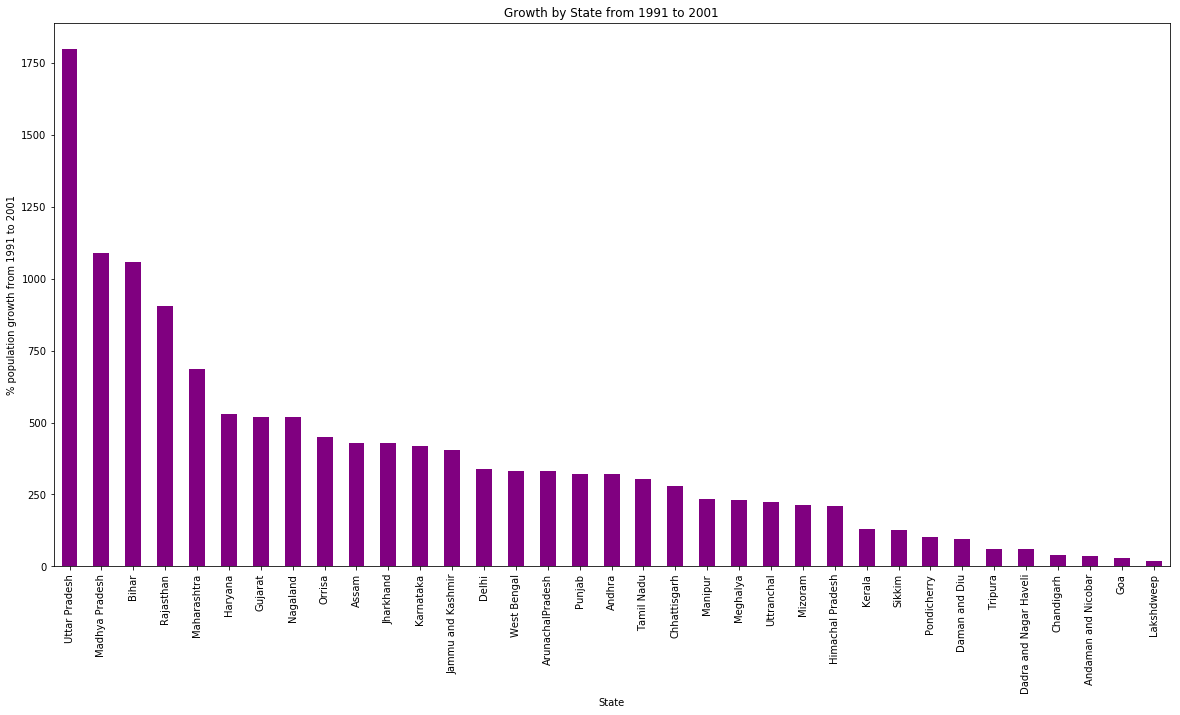

In [258]:
df = df.sort_values(by='Growth', ascending=False)
plt.figure(figsize=(20, 10))
df.Growth.plot(kind='bar', color='purple')
plt.ylabel('% population growth from 1991 to 2001')
plt.title('Growth by State from 1991 to 2001')



Now let's look at literacy rates across India, as well as schooling and education level. It's important to note the most populated cities of 2001, to see if the literacy rates are positively skewed toward states with big urban areas

1.  Mumbai in Maharashtra
2. Delhi in Delhi
3. Bangalore in Karnataka
4. Hyderbad in Telangana
5. Ahmedabad in Gujarat
6. Chennai in Tamil Nadu
7. Kolkata in West Bengal
8. Surat in Gujarat
9. Pune in Maharashtra
10. Jaipur in Rajasthan 

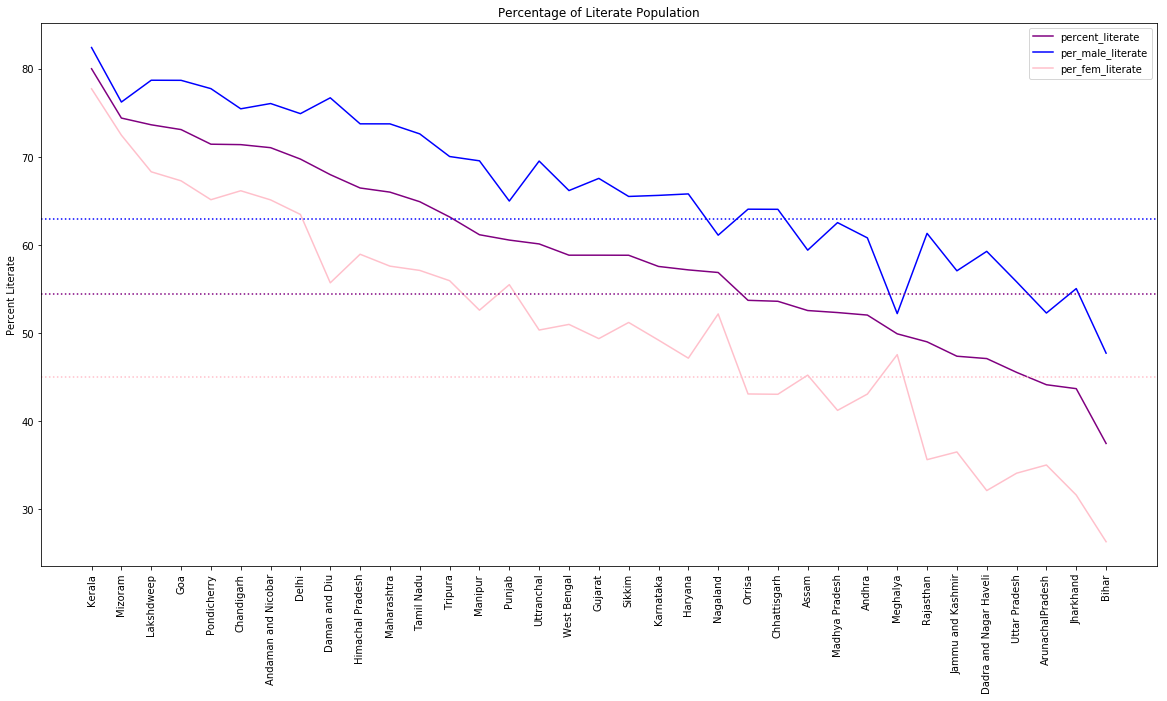

In India as a whole, 54.0% of the population is literate. 63.0% of males are literate, and 45.0 percent of females are literate


In [259]:
#Section the Data into states and sort by the literacy rate, as well as the percent of those literate who are male or female

df = india_census.groupby('State').aggregate(np.sum)

df['percent_literate'] = df['Persons_literate'] / df['Persons']
df['per_male_literate'] = df['Males_literate'] / df['Males']
df['per_fem_literate'] = df['Females_literate'] / df['Females']

mean_percent_all = round(sum(india_census['Persons_literate']) / sum(india_census['Persons'])*100, 0)
mean_percent_male = round(sum(india_census['Males_literate']) / sum(india_census['Males'])*100, 0)
mean_percent_fem = round(sum(india_census['Females_literate']) / sum(india_census['Females'])*100, 0)
 

df = df.sort_values(by='percent_literate', ascending=False)


plt.figure(figsize=(20, 10))
plt.plot(df['percent_literate']*100, color='purple')
plt.plot(df['per_male_literate']*100, color='blue')
plt.plot(df['per_fem_literate']*100, color='pink')
plt.plot()

#Add in a dotted horizontal line for the mean literacy rate
plt.axhline(y=mean_all, color='purple', linestyle='dotted')

#Add in a dotted horizontal line for the mean male literacy rate
plt.axhline(y=mean_percent_male, color='blue', linestyle='dotted')

#Add in a dotted horizontal line for the mean female literacy rate
plt.axhline(y=mean_percent_fem, color='pink', linestyle='dotted')
plt.ylabel('Percent Literate')
plt.title('Percentage of Literate Population')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print('In India as a whole, {}% of the population is literate. {}% of males are literate, and {} percent of females are literate'.format(mean_percent_all, mean_percent_male, mean_percent_fem))

We would expect for States with more urban areas to have higher literacy rates, as well as more equitible literacy rates between males and females. We do find that Kerala has the highest literacy rates, and in fact Kerala was declared a completely literate state in 1991 with a literacy rate of 90%. Interesting for further study would be to look into what measures government officials took to make it so, and we'll explore the schools per person later on in this analysis. As it turns out, some of the highest literacy rates are in States with smaller populations, such as Goa. However Goa also has the highest GDP in India, 2.5x more than the rest of the country. Delhi is also high on the list.

However, we can also see that states we might have expected to be more literate are lacking. Maharashtra, with the 2nd highest growth from 1991 and the fourth highest population in 2001, is 11th on the list, though the literacy rate is still higher than average.

It makes sense that richer, more-developed states -- and States with a higher population of expats -- would have higher literacy rates than very densely-populated states with lots of rural area. For example, one way that we can gaugue the ruralness of an area would be to look at our data on safe drinking water facilities, as well as education facilities. Let's replot the average literacy rate and also look at the levels of education in each State. 